# How to deal with a signal with out-of-bins frequencies

Real-world signals often include frequencies that do not align perfectly with the discrete frequency bins of the FFT, which can cause artifacts or "junk" in the transformed signal. However, there are several techniques to mitigate these artifacts:

<img src="image/dealing_with_out_of_bins_signals.png" align="left" width=600/>

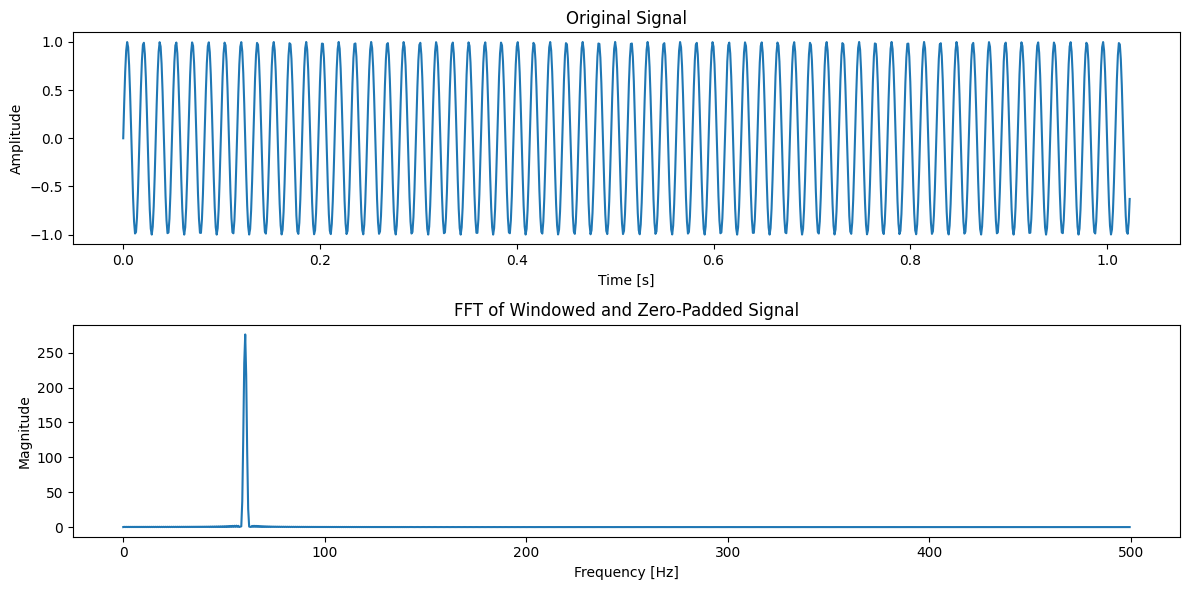

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
from scipy.fft import fft, fftfreq

# Parameters
fs = 1000  # Sampling frequency
N = 1024  # Original number of points
f_signal = 60.5  # Signal frequency
t = np.arange(N) / fs  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)

# Apply windowing function
window = get_window('hamming', N)
windowed_signal = signal * window

# Zero-padding
N_padded = 2048
signal_padded = np.pad(windowed_signal, (0, N_padded - N), 'constant')

# FFT
signal_fft = fft(signal_padded)
frequencies = fftfreq(N_padded, 1/fs)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:N_padded//2], np.abs(signal_fft[:N_padded//2]))
plt.title('FFT of Windowed and Zero-Padded Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()